# Get a LSST Simulated Cadence for Arbitrary Sky Position
___


___

In [1]:
"""

"""
# %matplotlib inline
%matplotlib notebook


from __future__ import print_function

try:
    from importlib import reload
except:
    pass


from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors 
from matplotlib import colorbar as mpl_colorbar
from matplotlib import rc
rc('text', usetex=True)

import os
import warnings

import numpy as np
import pandas as pd
import astropy as ap
import sfdmap

import sqlite3
from sqlalchemy import create_engine

from astropy import units as u
from astropy.coordinates import SkyCoord

import lsst_tools.utils as utils 
import lsst_tools.utils.colours as colours 

from multiprocessing import Pool, cpu_count
from contextlib import closing

Connect to .db file that contains the opsim output, read into a dataframe, `opsimdf`

In [2]:
# %%timeit ## 1 loop, best of 3: 1min 31s per loop 
# opsimdbpath = os.environ.get('OPSIMDBPATH')
# print(opsimdbpath)
opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/minion_1016_sqlite.db"
opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/Fake_Rolling/Rolling_3_80/Rolling_3_80.db"

conn = create_engine('sqlite:///'+opsimdbpath, echo = False)
opsimdf = pd.read_sql_table('Summary', con=conn)

OperationalError: (sqlite3.OperationalError) unable to open database file

In [3]:
opsimdf

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec
0,61,1016,53,297,2.208152,-1.096113,y,5308,59580.061443,0,...,0.000000,121.983579,0.799369,0.0,0.0,0.909616,69.236916,21.084922,2.174738,-1.122564
1,62,1016,53,180,2.437102,-1.195036,y,5349,59580.061915,0,...,0.000000,132.407937,0.799369,0.0,0.0,0.136237,6.788134,20.951019,2.395487,-1.221487
2,63,1016,53,140,2.513274,-1.238016,y,5387,59580.062359,0,...,0.000000,134.805912,0.799369,0.0,0.0,0.050425,4.325363,20.919163,2.466524,-1.264467
3,64,1016,53,108,2.611135,-1.279219,y,5426,59580.062802,0,...,0.000000,137.524490,0.799369,0.0,0.0,0.050956,4.319809,20.882435,2.558008,-1.305670
4,65,1016,53,83,2.739507,-1.318007,y,5464,59580.063246,0,...,0.000000,140.538643,0.799369,0.0,0.0,0.051847,4.320722,20.840852,2.678445,-1.344458
5,66,1016,53,69,2.911089,-1.353247,y,5502,59580.063689,0,...,0.000000,143.801191,0.799369,0.0,0.0,0.053177,4.330488,20.794668,2.840332,-1.379698
6,67,1016,53,40,2.847358,-1.399747,y,5541,59580.064134,0,...,0.000000,138.571306,0.799369,0.0,0.0,0.048078,4.453357,20.868102,2.757637,-1.426198
7,68,1016,53,61,2.649662,-1.362522,y,5579,59580.064578,0,...,0.000000,135.149382,0.799369,0.0,0.0,0.052511,4.322527,20.914561,2.575803,-1.388973
8,69,1016,53,78,2.513274,-1.321947,y,5617,59580.065021,0,...,0.000000,131.933216,0.799369,0.0,0.0,0.050916,4.308379,20.957271,2.451266,-1.348398
9,70,1016,53,112,2.415415,-1.279218,y,5656,59580.065465,0,...,0.000000,128.976371,0.799369,0.0,0.0,0.050035,4.308583,20.995839,2.362288,-1.305669


In [4]:
len(opsimdf["fieldID"].unique())

3339

In [5]:
#%%timeit ## The slowest run took 39.04 times longer than the fastest. This could mean that an intermediate result is being cached.
#         ## 1000 loops, best of 3: 246 µs per loop
n = 1
pos_df = utils.generate_coordinates(n)

Add extinction to the dataframe

In [6]:
#%%timeit ## 1 loop, best of 3: 88.6 ms per loop
df = utils.find_MW_extinction(pos_df) 

Check the positions are sensible

<IPython.core.display.Javascript object>


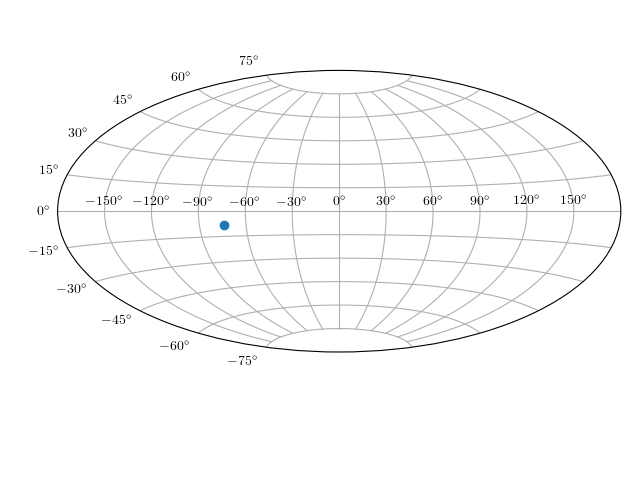

In [7]:
#%%timeit ## 1 loop, best of 3: 235 ms per loop
utils.plot_position_points(df)

Connecting to `.db` takes ages (~1min), and is a pain if you mess up, so create a 'working' instance to fiddle with

In [8]:
working_df = opsimdf

## Identifying Fields
___
We want to find out which field(s) the position is in. Create table that tells us the field centres, and find the edges.

In [9]:
# working_df = utils.get_field_corners(working_df.drop_duplicates("fieldID"))[['fieldRA', 'fieldDec']]
working_df = utils.get_field_corners(pd.DataFrame(working_df.drop_duplicates("fieldID"))[['fieldID', 'fieldRA', 'fieldDec']])

In [10]:
working_df

,fieldID,fieldRA,fieldDec,RA_upper,RA_lower,Dec_upper,Dec_lower
0,297,2.208152,-1.096113,2.238695,2.177609,-1.126656,-1.065570
1,180,2.437102,-1.195036,2.467645,2.406559,-1.225579,-1.164493
2,140,2.513274,-1.238016,2.543817,2.482731,-1.268559,-1.207473
3,108,2.611135,-1.279219,2.641678,2.580592,-1.309762,-1.248676
4,83,2.739507,-1.318007,2.770050,2.708964,-1.348550,-1.287464
5,69,2.911089,-1.353247,2.941632,2.880546,-1.383790,-1.322704
6,40,2.847358,-1.399747,2.877901,2.816815,-1.430290,-1.369204
7,61,2.649662,-1.362522,2.680205,2.619119,-1.393065,-1.331979
8,78,2.513274,-1.321947,2.543817,2.482731,-1.352490,-1.291404
9,112,2.415415,-1.279218,2.445958,2.384872,-1.309761,-1.248675


In [11]:
field_df = working_df[(working_df["RA_upper"] >= df["theta"][0] + np.pi) &
                (working_df["RA_lower"] <= df["theta"][0] + np.pi) &
                (working_df["Dec_lower"] >= df["phi"][0])  &
                (working_df["Dec_upper"] <= df["phi"][0])]

<IPython.core.display.Javascript object>


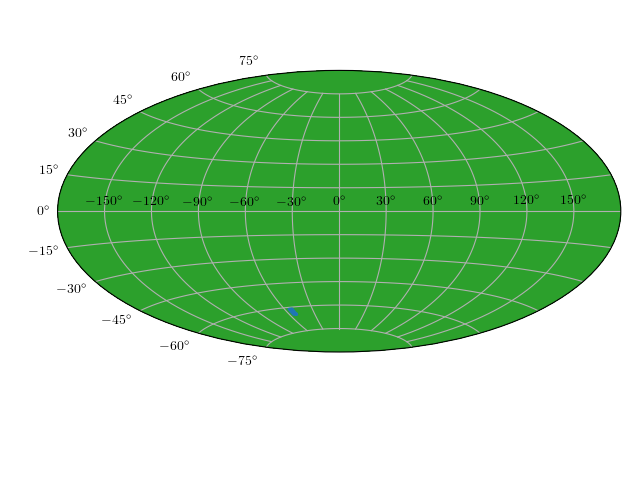

In [12]:
reload(utils)
utils.plot_field(working_df)

In [13]:
df = opsimdf

In [14]:
## Work out how often each field is visited
min_visits = df["fieldID"].value_counts().min()
max_visits = df["fieldID"].value_counts().max()

print(min_visits, ",",max_visits)

df['count'] = df.groupby('fieldID').cumcount()

180 , 22778


In [15]:
# ddf = [1427,744,2412,290,2786]

In [16]:
cmap = plt.get_cmap("viridis")
# df["cmap_visit_value"] = (df["count"] - min_visits )/(max_visits - min_visits)
df["cmap_visit_value"] = np.log((df["count"] + 1)/(max_visits+1))

In [17]:
df["cmap_visit_value"] = df["cmap_visit_value"] + np.abs(df["cmap_visit_value"].min())
df["cmap_visit_value"] = df["cmap_visit_value"]/df["cmap_visit_value"].max()

In [18]:
df["cmap_visit_value"].hist(bins = 200)

In [19]:
df["fieldID"].value_counts().hist(bins = 200, range = [0, 2000])

In [20]:
df = utils.get_field_corners(df)

In [21]:
night_group = df.groupby("night")

In [22]:
#TEST
# i = 0
# group = night_group.groups[0]
# outpath = "/Users/berto/plots/LSST/cadence/minion/skymap_night_"
# fig = plt.figure()
# fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
#                     right = 0.97, hspace=0, wspace = .1)

# ax_aitoff = fig.add_subplot(111, projection="aitoff")
# ax_aitoff.grid(True)
# ax_aitoff.scatter(df["fieldRA"][group] - np.pi, df["fieldDec"][group], color = cmap(df["cmap_visit_value"][group]))
# fig.savefig(outpath + str(i)+".pdf", format = 'pdf', dpi=500)
# plt.close()

In [23]:
# for group in night_group.groups:
#     print(night_group.groups[0])

In [24]:
df_to_plot = df[["fieldID", "fieldRA", "fieldDec", "cmap_visit_value"]]
df_to_plot["zorder"] = df_to_plot["fieldID"]*0
df_to_plot["zorder"].loc[df_to_plot["fieldID"].isin(ddf)] = 99

/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [25]:
df_to_plot.loc[night_group.groups[0]]

,fieldID,fieldRA,fieldDec,cmap_visit_value,zorder
0,297,2.208152,-1.096113,0.0,0
1,180,2.437102,-1.195036,0.0,0
2,140,2.513274,-1.238016,0.0,0
3,108,2.611135,-1.279219,0.0,0
4,83,2.739507,-1.318007,0.0,0
5,69,2.911089,-1.353247,0.0,0
6,40,2.847358,-1.399747,0.0,0
7,61,2.649662,-1.362522,0.0,0
8,78,2.513274,-1.321947,0.0,0
9,112,2.415415,-1.279218,0.0,0


In [26]:
x = len(night_group.groups)

In [27]:
str('%05d' % x)

'03026'

In [28]:
df_to_plot

,fieldID,fieldRA,fieldDec,cmap_visit_value,zorder
0,297,2.208152,-1.096113,0.000000,0
1,180,2.437102,-1.195036,0.000000,0
2,140,2.513274,-1.238016,0.000000,0
3,108,2.611135,-1.279219,0.000000,0
4,83,2.739507,-1.318007,0.000000,0
5,69,2.911089,-1.353247,0.000000,0
6,40,2.847358,-1.399747,0.000000,0
7,61,2.649662,-1.362522,0.000000,0
8,78,2.513274,-1.321947,0.000000,0
9,112,2.415415,-1.279218,0.000000,0


In [29]:
# def plot_obs(df):
#     outpath = "/Users/berto/plots/LSST/cadence/minion/Test_skymap_night_"

#     df_to_plot = df[["fieldID", "fieldRA", "fieldDec", "cmap_visit_value"]]
#     df_to_plot["zorder"] = df_to_plot["fieldID"]*0
#     df_to_plot["zorder"].loc[df_to_plot["fieldID"].isin(ddf)] = 99

#     norm = mpl_colors.LogNorm(vmin=max_visits, vmax=min_visits)


#     for i, group in enumerate(np.arange(10)):
#     # for i, group in enumerate(night_group.groups):

#         if i == 0:
#             fig = plt.figure()
#             fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
#                                 right = 0.97, hspace=0, wspace = .1)

#     #         ax_aitoff = fig.add_subplot(111, projection="aitoff")      
#             ax_aitoff = plt.subplot2grid((1,24), (0,0), colspan = 22, rowspan = 1, projection="aitoff")
#             ax_aitoff.grid(True)
#             ax_cbar = plt.subplot2grid((1,24), (0,22), colspan = 1, rowspan = 1)
#     #         ax_active = fig.add_subplot(111, projection="aitoff")


#             working_df_to_plot = df_to_plot.loc[night_group.groups[group]]
#         else:
#             working_df_to_plot = pd.concat([working_df_to_plot,df_to_plot.loc[night_group.groups[group]]])
#             working_df_to_plot.drop_duplicates(subset=['fieldID'], inplace=True, keep="last")

#     #     ax_aitoff.scatter(working_df_to_plot["fieldRA"][night_group.groups[group]] - np.pi, 
#     #               working_df_to_plot["fieldDec"][night_group.groups[group]], 
#     #               color = cmap(working_df_to_plot["cmap_visit_value"][night_group.groups[group]]))

#         ax_aitoff.scatter(working_df_to_plot["fieldRA"] - np.pi, 
#                           working_df_to_plot["fieldDec"], 
#                           color = cmap(working_df_to_plot["cmap_visit_value"]))

#         ax_aitoff.scatter(working_df_to_plot.loc[df_to_plot["zorder"] == 99,["fieldRA"]] - np.pi, 
#                           working_df_to_plot.loc[df_to_plot["zorder"] == 99,["fieldDec"]], 
#                           color = cmap(working_df_to_plot[working_df_to_plot["zorder"] == 99]["cmap_visit_value"])
#                           )

#     #     fig_cont = fig

#     #     ax_active.scatter(working_df_to_plot["fieldRA"] - np.pi, 
#     #                       working_df_to_plot["fieldDec"], 
#     #                       color = cmap(working_df_to_plot["cmap_visit_value"]),
#     #                       linewidths = 0.5 , edgecolors = colours.hex["black"])

#         cb1 = mpl_colorbar.ColorbarBase(ax_cbar, cmap=cmap,
#                                     norm=norm)
#         fig.savefig(outpath + str('%05d' % i)+".png", format = 'png', dpi=200)

#     #     ax_active.clear()
#     #     print(len(working_df_to_plot))
#     # plt.close()

In [ ]:
df_to_plot = df[["fieldID", "fieldRA", "fieldDec", "cmap_visit_value"]]

# outpath = "/Users/berto/plots/LSST/cadence/minion/Test_skymap_night_"
outpath = os.path.join(os.environ["HOME"], "plots/LSST/cadence/Fake_Rolling/skymap_night_")

df_to_plot["zorder"] = df_to_plot["fieldID"]*0
df_to_plot["zorder"].loc[df_to_plot["fieldID"].isin(ddf)] = 99
norm = mpl_colors.LogNorm(vmin=max_visits, vmax=min_visits)


# for i, group in enumerate(np.arange(4)):
for i, group in enumerate(night_group.groups):

    if i == 0:
        fig = plt.figure()
        fig.subplots_adjust(left = 0.05, bottom = 0.05, top = 0.99,
                            right = 0.97, hspace=0, wspace = .1)
    
#         ax_aitoff = plt.subplot2grid((1,24), (0,0), colspan = 22, rowspan = 1, projection="aitoff")
#         ax_aitoff.grid(True)
#         ax_active = plt.subplot2grid((1,24), (0,0), colspan = 22, rowspan = 1, projection="aitoff")
#         ax_active.grid(True)
    
        ax_aitoff = fig.add_subplot(111, projection = "aitoff")
        ax_active = fig.add_subplot(111, projection = "aitoff")
        ax_aitoff.grid(True)
        ax_active.grid(True)
        ax_aitoff.set_xticklabels(['$2^h$','$4^h$','$6^h$', '$8^h$', '$10^h$', '$12^h$',
                                  '$14^h$','$16^h$','$18^h$','$20^h$','$22^h$'], fontsize=10)
        ax_active.set_xticklabels(['$2^h$','$4^h$','$6^h$', '$8^h$', '$10^h$', '$12^h$',
                                  '$14^h$','$16^h$','$18^h$','$20^h$','$22^h$'], fontsize=10)
#         ax_cbar = plt.subplot2grid((1,24), (0,22), colspan = 1, rowspan = 1)
        ax_cbar = fig.add_subplot(20,1,19)
        cb1 = mpl_colorbar.ColorbarBase(ax_cbar, cmap=cmap,
                                norm=norm, orientation='horizontal')
        cb1.set_label(r'$\textnormal{Number of Visits}$')
        
        working_df_to_plot = df_to_plot.loc[night_group.groups[group]]

    else:
#         ax_active = fig.add_subplot(111, projection = "aitoff")
        working_df_to_plot = pd.concat([working_df_to_plot,df_to_plot.loc[night_group.groups[group]]])
    
        working_df_to_plot.drop_duplicates(subset=['fieldID'], inplace=True, keep="last")
    
    s = r"$\textnormal{night} = " + str(i) + "$"
    txt = plt.figtext(0.85, 0.8, s)
        
    s1 = ax_aitoff.scatter(working_df_to_plot["fieldRA"] - np.pi, 
                      working_df_to_plot["fieldDec"], 
                      color = cmap(working_df_to_plot["cmap_visit_value"]))

    
    s2 = ax_aitoff.scatter(working_df_to_plot.loc[df_to_plot["zorder"] == 99,["fieldRA"]] - np.pi, 
                      working_df_to_plot.loc[df_to_plot["zorder"] == 99,["fieldDec"]], 
                      color = cmap(working_df_to_plot[working_df_to_plot["zorder"] == 99]["cmap_visit_value"])
                      )
    
    s_a = ax_active.scatter(df_to_plot.loc[night_group.groups[group]]["fieldRA"] - np.pi, 
                      df_to_plot.loc[night_group.groups[group]]["fieldDec"], 
                      color = cmap(df_to_plot.loc[night_group.groups[group]]["cmap_visit_value"]),
                      edgecolor = colours.hex["black"])


    plt.draw()
    fig.savefig(outpath + str('%05d' % i)+".png", format = 'png', dpi=200)
    s_a.remove()
    txt.remove()

/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/berto/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

<IPython.core.display.Javascript object>

In [ ]:
ones = np.ones(10)

In [ ]:
len(ones[0:])

In [ ]:
working_df_to_plot[working_df_to_plot["zorder"] == 99]["cmap_visit_value"]

In [ ]:
df_to_plot.loc[df_to_plot["zorder"] == 99,["fieldRA"]]

In [ ]:
# working_df_to_plot["fieldID"] in df_to_plot["fieldID"]
# df1 = working_df_to_plot.head(10)
# df2 = working_df_to_plot.tail(10)
df1 = df_to_plot.loc[df_to_plot["fieldID"] == 505].head(1)
df2 = df_to_plot.loc[df_to_plot["fieldID"] == 505].tail(1)

In [ ]:
df_to_plot["zorder"].loc[df_to_plot["fieldID"].isin(ddf)] = 1

In [ ]:
df_to_plot["zorder"].loc[df_to_plot["fieldID"].isin(ddf)]

In [ ]:
df2

In [ ]:
df1

In [ ]:
df3 = pd.concat([df1,df2])

In [ ]:
df3

In [ ]:
df3.drop_duplicates(subset=['fieldID'], inplace=True, keep="last")

In [ ]:
df3

In [ ]:
df.loc[df["fieldID"] == 505].head(10)

In [ ]:
# outpath = "/Users/berto/plots/LSST/cadence/minion/skymap_"


# for row in df.iterrows():
#     fig = plt.figure()
#     fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
#                         right = 0.97, hspace=0, wspace = .1)

#     ax_aitoff = fig.add_subplot(111, projection="aitoff")
#     ax_aitoff.grid(True)
#     ax_aitoff.scatter(row["fieldRA"] - np.pi, row["fieldDec"], color = cmap(row[cmap_visit_value]))
    
#     fig.savefig(outpath + row["obsHistID"]+".pdf", format = 'pdf', dpi=500)

In [ ]:
data = {}
x = np.arange(10)

for i in np.arange(5):
    data[str(i)] = np.random.random(10)

outpath = "/Users/berto/plots/LSST/cadence/test_"

for i, j in enumerate(data):
    if i == 0:
        fig = plt.figure()
        fig.subplots_adjust(left = 0.05, bottom = 0.01, top = 0.99,
                            right = 0.97, hspace=0, wspace = .1)

        ax = fig.add_subplot(111, projection = "aitoff")
        ax_active = fig.add_subplot(111, projection = "aitoff")
        
    else:
        pass
    
    s1 = ax.scatter(x, data[j], color = colours.hex["pomegranite"])
    s2 = ax_active.scatter(x, data[j], color = colours.hex["pomegranite"], edgecolor = "black")
    
    fig.savefig(outpath + str('%05d' % i)+".png", format = 'png', dpi=200)
    s2.remove()
